# Estimativa de Autonomia de Veículos Elétricos com Machine Learning

Este notebook tem como objetivo prever a autonomia (em quilômetros) de veículos elétricos com base em suas especificações técnicas e físicas, utilizando técnicas de aprendizado de máquina.

Dataset utilizado: [Electric Vehicle Specifications Dataset 2025 – Kaggle](https://www.kaggle.com/datasets/urvishahir/electric-vehicle-specifications-dataset-2025)

## 1. Importação de Bibliotecas e Leitura dos Dados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('electric_vehicles_spec_2025.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


## 2. Análise Exploratória dos Dados (EDA)

In [6]:
# Informações gerais
df.info()

# Estatísticas descritivas
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

,count,mean,std,min,25%,50%,75%,max
top_speed_kmh,478.0,185.487448,34.252773,125.0,160.0,180.00,201.00,325.0
battery_capacity_kWh,478.0,74.043724,20.331058,21.3,60.0,76.15,90.60,118.0
number_of_cells,276.0,485.293478,1210.819733,72.0,150.0,216.00,324.00,7920.0
torque_nm,471.0,498.012739,241.461128,113.0,305.0,430.00,679.00,1350.0
efficiency_wh_per_km,478.0,162.903766,34.317532,109.0,143.0,155.00,177.75,370.0
range_km,478.0,393.179916,103.287335,135.0,320.0,397.50,470.00,685.0
acceleration_0_100_s,478.0,6.882636,2.730696,2.2,4.8,6.60,8.20,19.1
fast_charging_power_kw_dc,477.0,125.008386,58.205012,29.0,80.0,113.00,150.00,281.0
towing_capacity_kg,452.0,1052.261062,737.851774,0.0,500.0,1000.00,1600.00,2500.0
seats,478.0,5.263598,1.003961,2.0,5.0,5.00,5.00,9.0


In [7]:
# Verificando valores ausentes
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

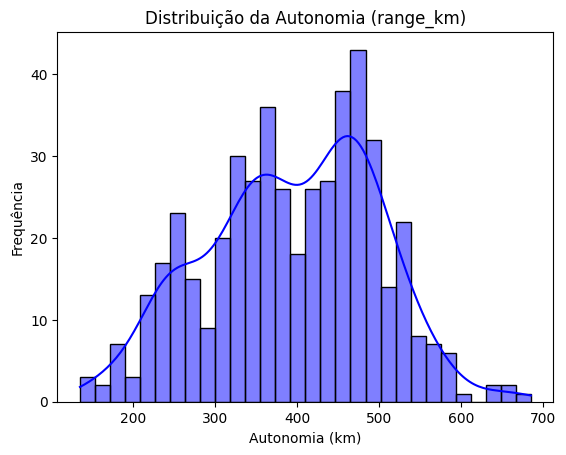

In [8]:
# Distribuição da variável alvo
sns.histplot(df['range_km'], kde=True, bins=30, color='blue')
plt.title('Distribuição da Autonomia (range_km)')
plt.xlabel('Autonomia (km)')
plt.ylabel('Frequência')
plt.show()

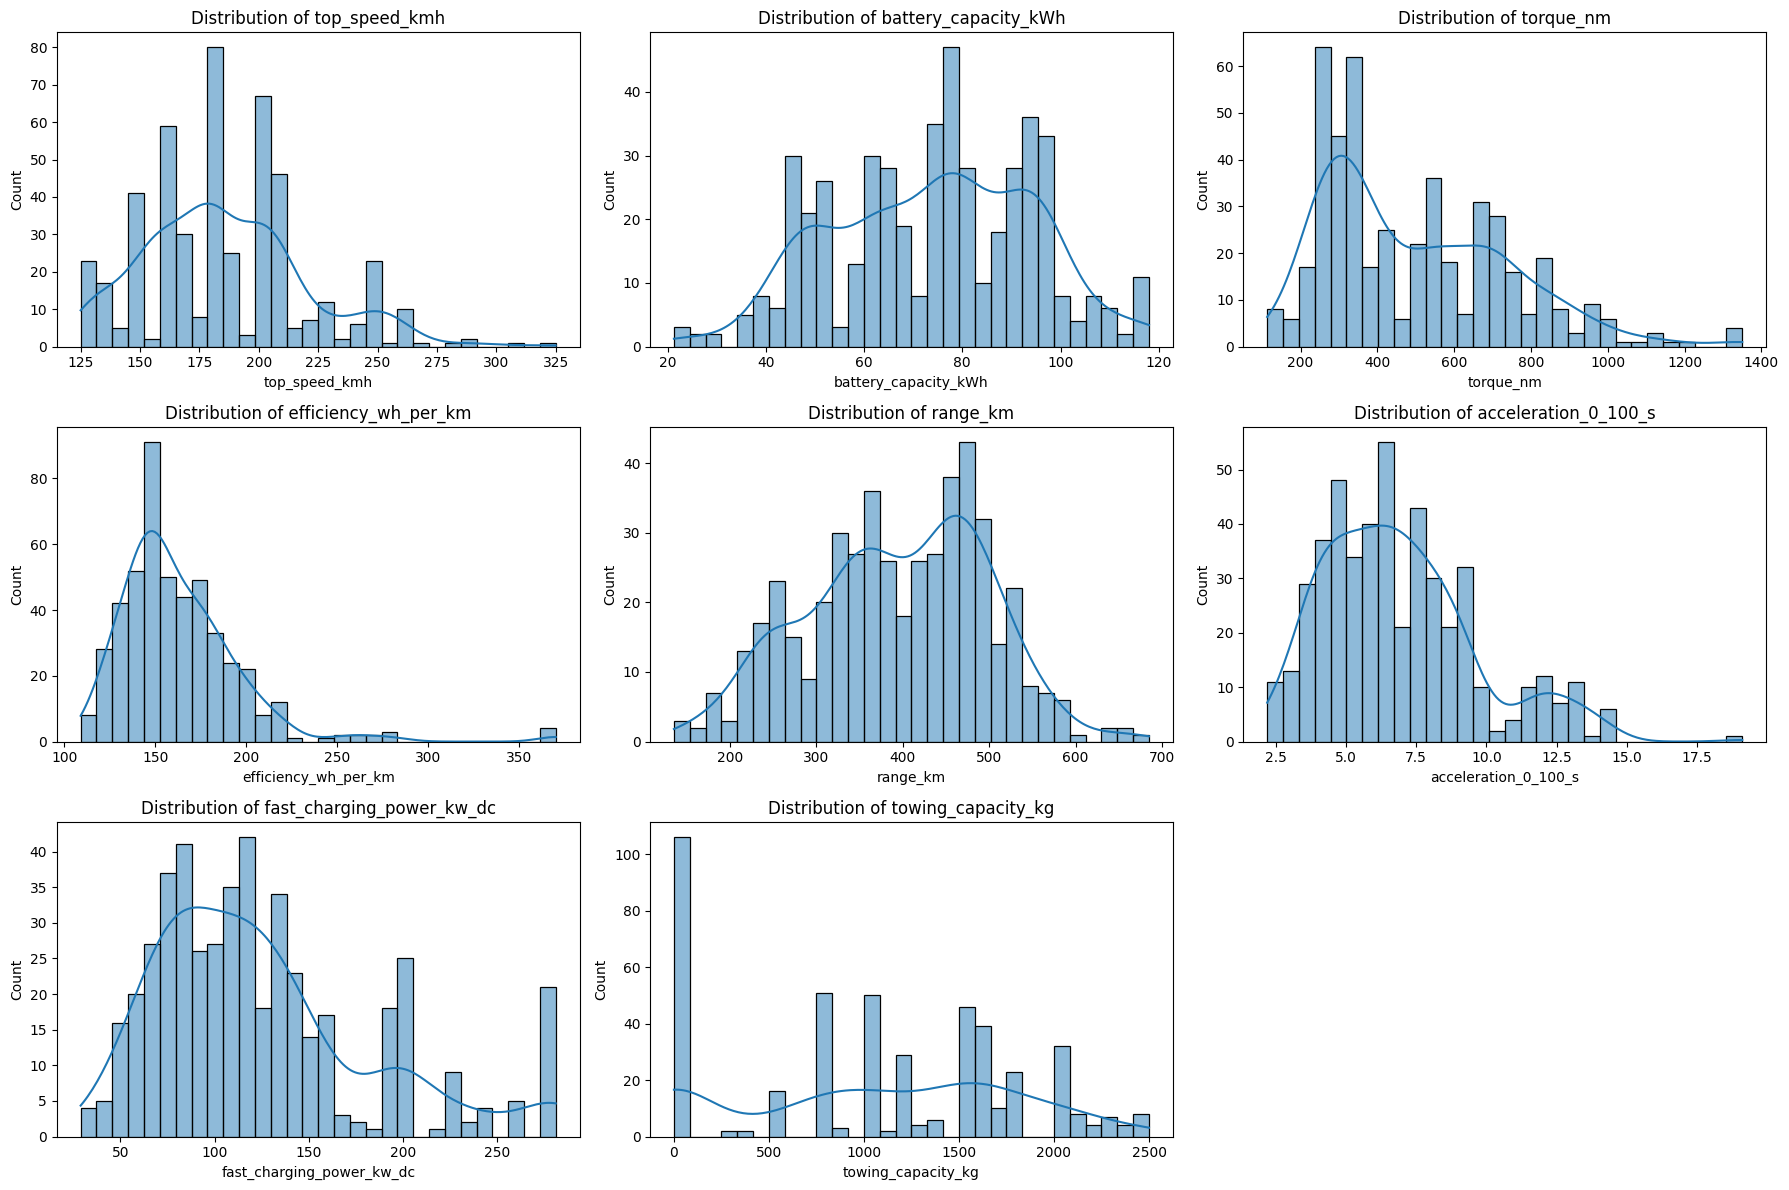

In [9]:
num_cols = ['top_speed_kmh', 'battery_capacity_kWh', 'torque_nm', 'efficiency_wh_per_km',
            'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'towing_capacity_kg']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

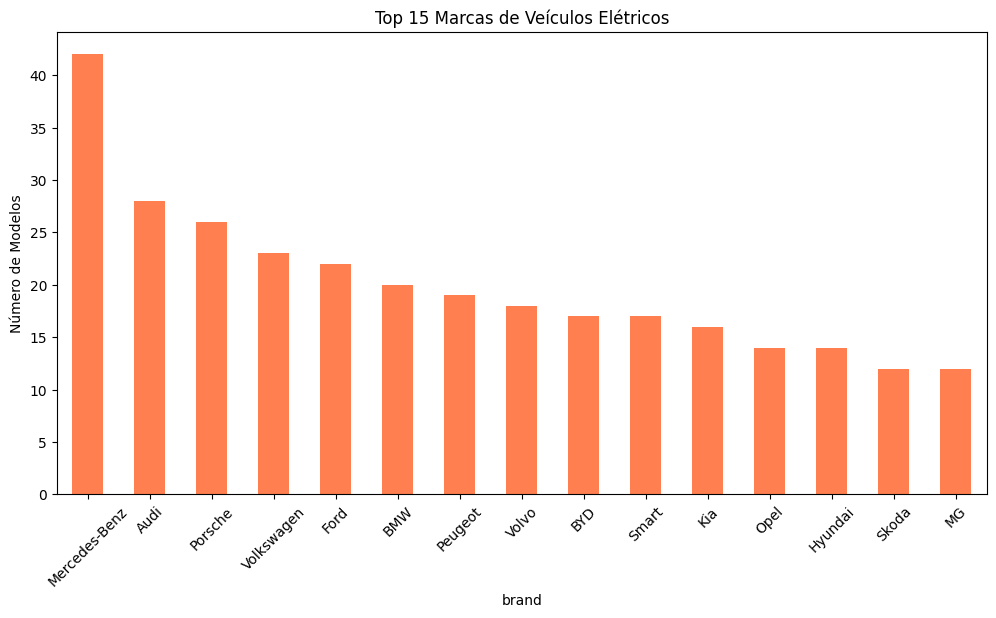

In [11]:
# Visualização adicional: Top 15 marcas com mais modelos no dataset
plt.figure(figsize=(12, 6))
df['brand'].value_counts().head(15).plot(kind='bar', color='coral')
plt.title("Top 15 Marcas de Veículos Elétricos")
plt.ylabel("Número de Modelos")
plt.xticks(rotation=45)
plt.show()

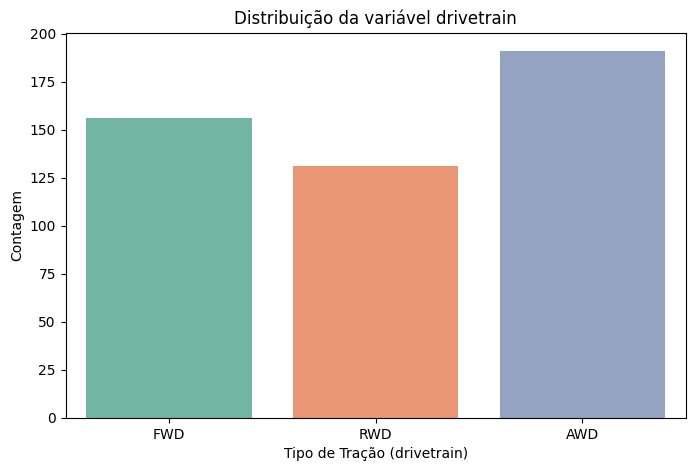

In [12]:
# Distribuição da variável categórica 'drivetrain'
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='drivetrain', palette='Set2')
plt.title('Distribuição da variável drivetrain')
plt.xlabel('Tipo de Tração (drivetrain)')
plt.ylabel('Contagem')
plt.show()

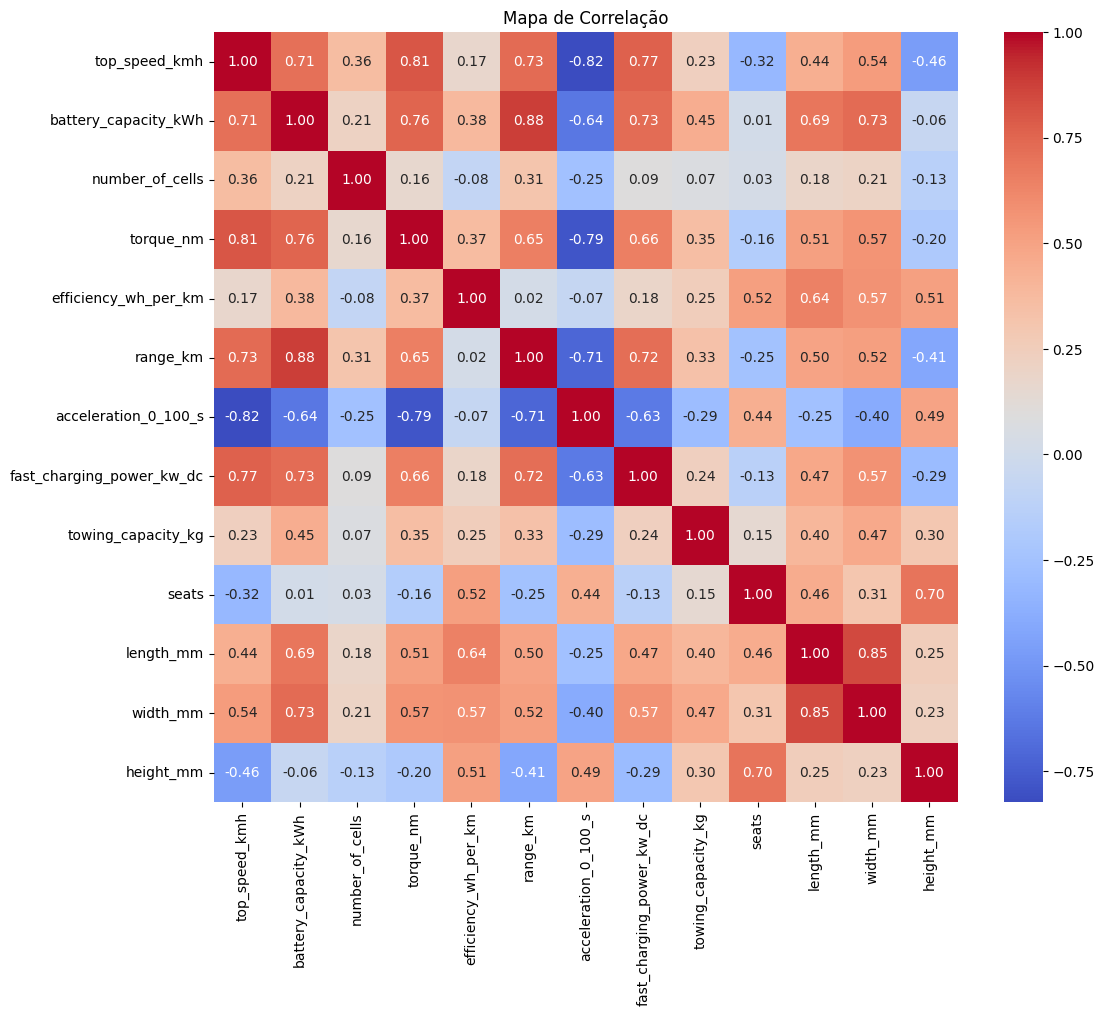

In [13]:
# Mapa de correlação entre variáveis numéricas
num_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(12,10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()

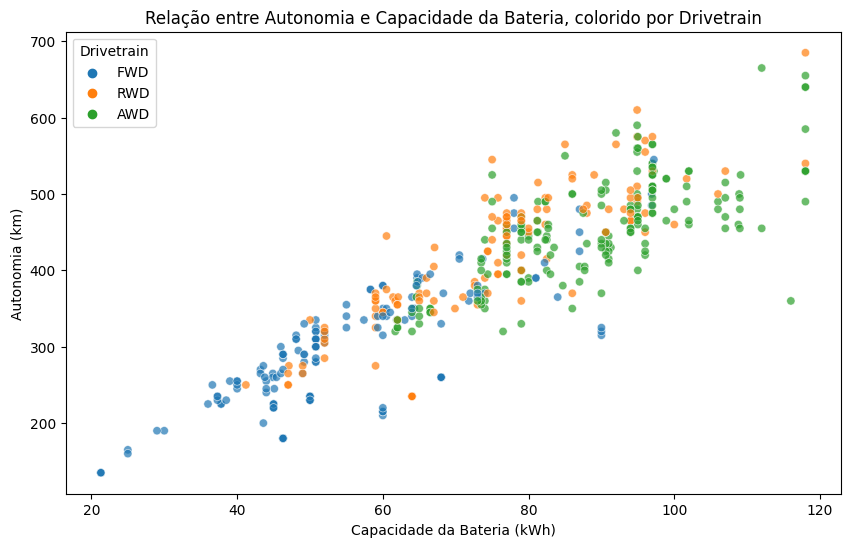

In [14]:
# Relação entre Autonomia e Capacidade da Bateria, colorido por 'drivetrain'
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='battery_capacity_kWh', y='range_km', hue='drivetrain', alpha=0.7)
plt.title('Relação entre Autonomia e Capacidade da Bateria, colorido por Drivetrain')
plt.xlabel('Capacidade da Bateria (kWh)')
plt.ylabel('Autonomia (km)')
plt.legend(title='Drivetrain')
plt.show()

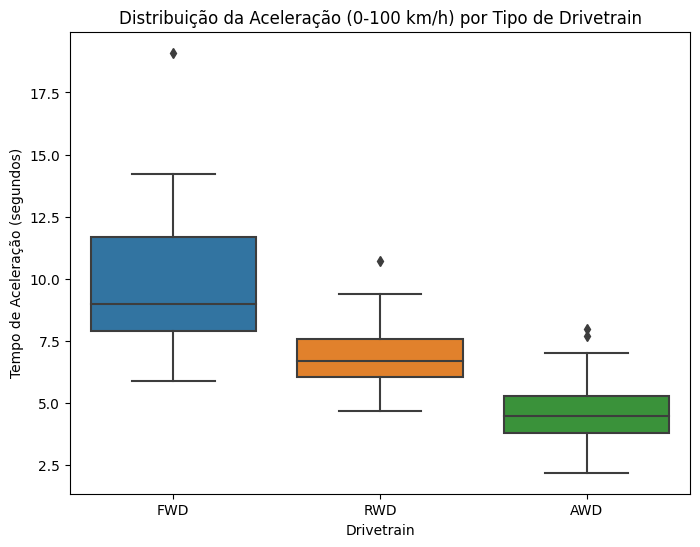

In [15]:
# Distribuição da aceleração agrupada por 'drivetrain'
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='drivetrain', y='acceleration_0_100_s')
plt.title('Distribuição da Aceleração (0-100 km/h) por Tipo de Drivetrain')
plt.xlabel('Drivetrain')
plt.ylabel('Tempo de Aceleração (segundos)')
plt.show()

## 3. Pré-Processamento dos Dados

In [17]:
# Separando features e target
X = df.drop(columns='range_km')
y = df['range_km']

# Separando colunas numéricas e categóricas
num_features = X.select_dtypes(include=np.number).columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()

# Pipeline para variáveis numéricas: imputação + padronização
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variáveis categóricas: one-hot encoding
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Aplicando transformações específicas para cada tipo de variável
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Treinamento e Avaliação dos Modelos

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

results = []
for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    results.append({'Modelo': name, 'RMSE': rmse, 'R²': r2})

results_df = pd.DataFrame(results).sort_values(by='RMSE')
results_df

,Modelo,RMSE,R²
0,Linear Regression,16.113090,0.975464
1,Ridge,16.459046,0.974399
4,Gradient Boosting,18.729950,0.966848
6,Extra Trees,20.193639,0.961464
3,Random Forest,21.512474,0.956266
2,Lasso,23.148406,0.949361
5,AdaBoost,28.401071,0.923773
8,KNN,36.311729,0.875395
7,SVR,84.127658,0.331164


## 5. Visualização dos Resultados

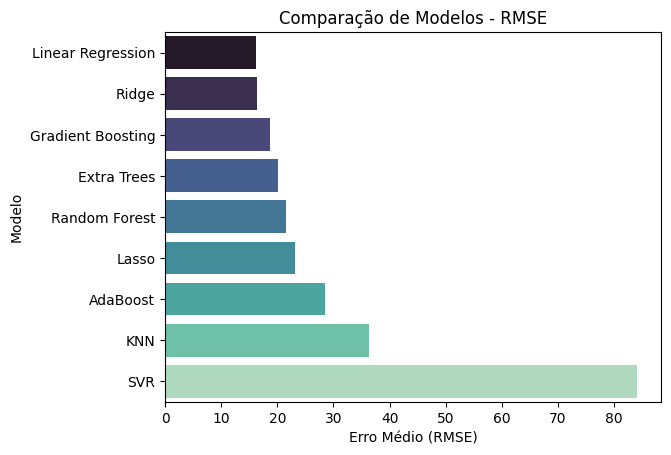

In [21]:
sns.barplot(data=results_df, x='RMSE', y='Modelo', palette='mako')
plt.title('Comparação de Modelos - RMSE')
plt.xlabel('Erro Médio (RMSE)')
plt.ylabel('Modelo')
plt.show()

### Por que usar Ridge Regression ao invés da Regressão Linear Simples?

- A regressão linear simples apresentou o menor RMSE (16.11), ligeiramente melhor que o Ridge (16.46).
- Contudo, Ridge oferece maior estabilidade e prevenção contra overfitting, especialmente útil para modelos com muitas variáveis.
- Essa é a razão para preferirmos o modelo Ridge para visualização detalhada e aplicação prática, mesmo com métrica levemente pior.


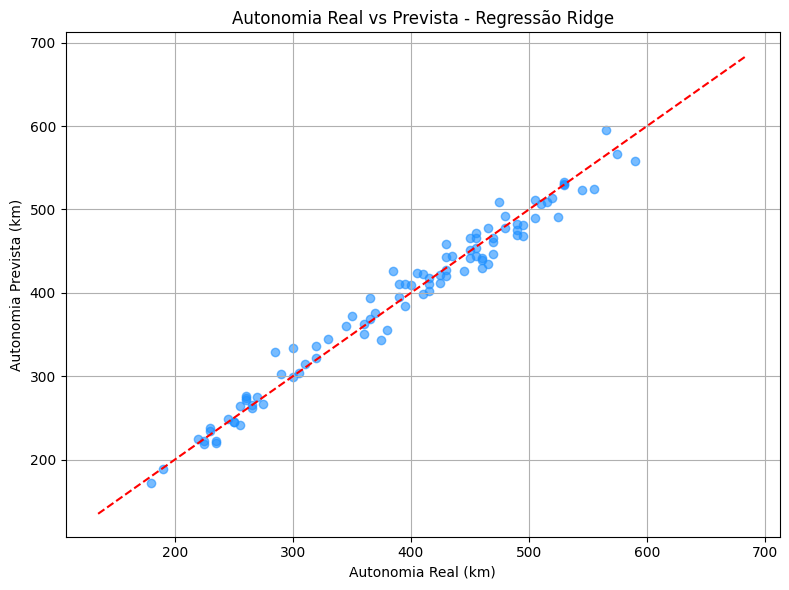

In [23]:
# Treinando o melhor modelo (Ridge Regression) para visualização detalhada
best_model = make_pipeline(preprocessor, Ridge())
best_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred_best = best_model.predict(X_test)

# Plotando valores reais vs previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='dodgerblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Linha de referência ideal (y = x)
plt.xlabel("Autonomia Real (km)")
plt.ylabel("Autonomia Prevista (km)")
plt.title("Autonomia Real vs Prevista - Regressão Ridge")
plt.grid(True)
plt.tight_layout()
plt.show()


## 6. Conclusões

Neste projeto, abordamos um problema relevante da vida real: a estimativa da autonomia de veículos elétricos (EVs). Com o crescimento acelerado da indústria automotiva e a crescente demanda por soluções sustentáveis, entender e prever a autonomia dos EVs torna-se fundamental para consumidores, fabricantes e planejadores de infraestrutura.

Através da análise exploratória dos dados e da aplicação de técnicas de machine learning, foi possível identificar os principais fatores que influenciam a autonomia, como a capacidade da bateria, eficiência energética e características do veículo. Modelos preditivos, especialmente a regressão Ridge, mostraram alta capacidade de generalização, possibilitando previsões confiáveis da autonomia com base em dados técnicos.

Este trabalho destaca a importância do uso de dados públicos e não confidenciais para resolver problemas complexos do mundo real. A análise de dados e o aprendizado de máquina fornecem ferramentas poderosas para extrair insights valiosos e apoiar decisões estratégicas em setores em rápida transformação.

Assim, o projeto demonstra que o domínio dos dados e a aplicação correta de modelos preditivos são essenciais para desenvolver soluções inovadoras e eficientes, contribuindo para o avanço tecnológico e a sustentabilidade ambiental.
